# NE 579 Homework Number 2: Data Statistics

## Import required libraries

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy.stats import trim_mean, skew, kurtosis

In [102]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

## Load the data from the file

In [2]:
fn = 'hwkdata.mat'
data_dict = sio.loadmat(fn)
print(data_dict.keys())

dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])


In [3]:
data_dict['x'].shape

(252, 14)

In [4]:
data_dict['y'].shape

(252, 1)

In [5]:
data = np.append(data_dict['x'], data_dict['y'], 1)

In [6]:
data.shape

(252, 15)

Now the 2-d array `data` contains 252 samples, each with 14 input variables and 1 output variable

I will want to label the columns later...

In [115]:
parameter_names = [
    'Age',
    'Weight',
    'Height',
    'Adiposity Index',
    'Neck circumference',
    'Chest circumference',
    'Abdomen circumference',
    'Hip circumference',
    'Thigh circumference',
    'Knee circumference',
    'Ankle circumference',
    'Extended bicep circumference',
    'Forearm circumference',
    'Wrist circumference',
    '% Bodyweight'
]

## Calculate statistical properties of the data:
- Maximum
- Minimum
- Mean
- Median
- 20% trimmed mean
- Standard deviation
- Variance
- Skewness
- Kurtosis

### Maximum

In [7]:
np.max(data, axis=0)

array([ 81.  , 363.15,  77.75,  48.9 ,  51.2 , 136.2 , 148.1 , 147.7 ,
        87.3 ,  49.1 ,  33.9 ,  45.  ,  34.9 ,  21.4 ,  45.1 ])

### Minimum

In [8]:
np.min(data, axis=0)

array([ 22. , 118.5,  29.5,  18.1,  31.1,  79.3,  69.4,  85. ,  47.2,
        33. ,  19.1,  24.8,  21. ,  15.8,   0. ])

### Mean

In [9]:
np.mean(data, axis=0)

array([ 44.88492063, 178.92440476,  70.14880952,  25.43690476,
        37.99206349, 100.82420635,  92.55595238,  99.9047619 ,
        59.40595238,  38.59047619,  23.10238095,  32.2734127 ,
        28.66388889,  18.2297619 ,  18.93849206])

### Median

In [10]:
np.median(data, axis=0)

array([ 43.  , 176.5 ,  70.  ,  25.05,  38.  ,  99.65,  90.95,  99.3 ,
        59.  ,  38.5 ,  22.8 ,  32.05,  28.7 ,  18.3 ,  19.  ])

### 20% Trimmed Mean

In [11]:
trim_mean(data, 0.2, axis=0)

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


array([ 44.44078947, 176.55361842,  70.25      ,  25.05986842,
        37.92894737, 100.12763158,  91.80789474,  99.32828947,
        59.13092105,  38.49144737,  22.91381579,  32.16118421,
        28.69934211,  18.21776316,  18.86578947])

### Standard Deviation

In [12]:
np.std(data, axis=0)

array([12.57701082, 29.3307901 ,  3.65558099,  3.64086527,  2.4260852 ,
        8.41373177, 10.76166054,  7.14982914,  5.2395251 ,  2.4070145 ,
        1.69152717,  3.0152732 ,  2.01667787,  0.93173074,  7.73546169])

### Variance

In [13]:
np.var(data, axis=0)

array([158.18120118, 860.29524766,  13.36327239,  13.25589994,
         5.88588939,  70.79088231, 115.81333759,  51.12005669,
        27.4526233 ,   5.79371882,   2.86126417,   9.09187248,
         4.06698964,   0.86812217,  59.83736757])

### Skewness

In [14]:
skew(data, axis=0)

array([ 0.28183067,  1.19807685, -5.35287991,  1.55239101,  0.54932508,
        0.6774921 ,  0.83341904,  1.48820106,  0.81631331,  0.51366304,
        2.24168861,  0.28382759, -0.21802506,  0.27993485,  0.14338879])

### Kurtosis

In [15]:
kurtosis(data, axis=0)

array([-0.43193939,  5.14182358, 58.34569713,  6.55632326,  2.64223799,
        0.94408639,  2.18073601,  7.30021682,  2.5894009 ,  1.01687492,
       11.68578418,  0.46494688,  0.82550054,  0.36415485, -0.32445733])

#### Also calculate $Kurt - 3$

In [16]:
kurtosis(data, axis=0) - 3 * np.ones_like(kurtosis(data, axis=0))

array([-3.43193939,  2.14182358, 55.34569713,  3.55632326, -0.35776201,
       -2.05591361, -0.81926399,  4.30021682, -0.4105991 , -1.98312508,
        8.68578418, -2.53505312, -2.17449946, -2.63584515, -3.32445733])

In [43]:
np.maximum(kurtosis(data, axis=0))

ValueError: invalid number of arguments

#### Difference between mean and median

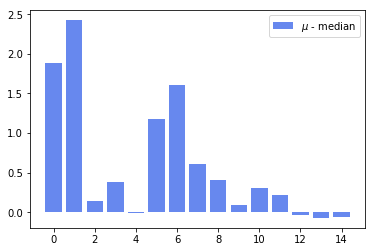

In [108]:
with sns.color_palette('coolwarm'):
    s = np.divide(np.mean(data, axis=0) - np.median(data, axis=0), np.std(data, axis=0))
    #plt.bar(np.arange(s.shape[0]), s, alpha=0.5, label=r'$\mu$ - median')
    plt.bar(np.arange(s.shape[0]), np.mean(data, axis=0) - np.median(data, axis=0), label=r'$\mu$ - median')
    #plt.bar(np.arange(s.shape[0]), kurtosis(data, axis=0) / kurtosis(data, axis=0).max(axis=0),
    #        alpha=0.5, label='Kurtosis')
    #plt.bar(np.arange(s.shape[0]), skew(data, axis=0),
    #        alpha=0.5, label='Skewness')
    plt.legend(loc="upper right")
    plt.show()

From this plot we see that the mean (sensitive to outliers) exceeds the median (insensitive to outliers) 

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  >>> from scipy import stats


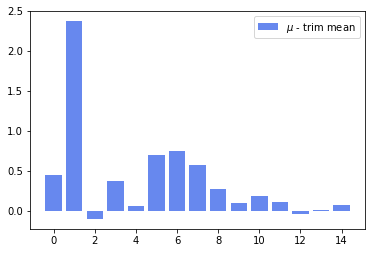

In [109]:
with sns.color_palette('coolwarm'):
    plt.bar(np.arange(np.mean(data, axis=0).shape[0]),
        np.mean(data, axis=0) - trim_mean(data, 0.2, axis=0), label=r'$\mu$ - trim mean')
    plt.legend(loc='upper right')
    #plt.bar(np.arange(trim_mean(data, 0.2, axis=0).shape[0]),
    #        trim_mean(data, 0.2, axis=0))
    plt.show()

# Now look at covariance and correlation

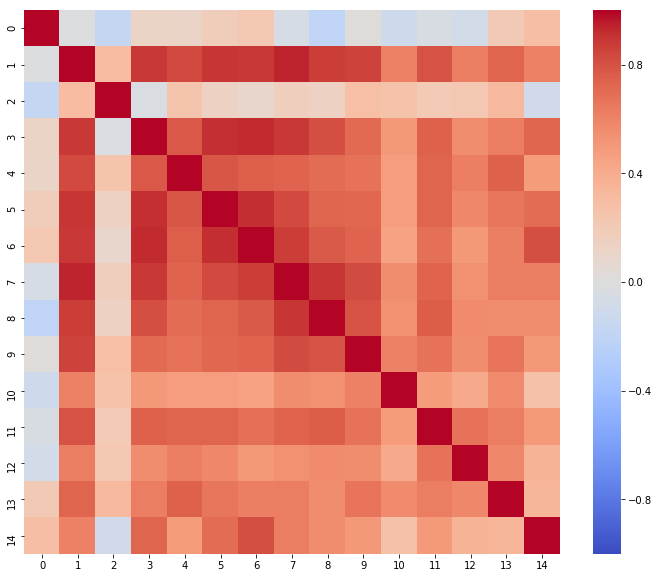

In [85]:
w, h = plt.figaspect(1)
plt.figure(figsize=(3*w, 2.5*h))
sns.heatmap(np.corrcoef(data.T), vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

# Pandas

In [119]:
stat_names = [
    "Parameter", "Max", "Min", "Mean", "Median", "20% Trimmed Mean",
    "Standard Deviation", "Variance", "Skewness", "Kurtosis"
]

In [120]:
summary_statistics = pd.DataFrame(columns=stat_names)
summary_statistics['Parameter'] = parameter_names
summary_statistics['Max'] = np.max(data, axis=0)
summary_statistics['Min'] = np.min(data, axis=0)
summary_statistics['Mean'] = np.mean(data, axis=0)
summary_statistics['Median'] = np.median(data, axis=0)
summary_statistics['20% Trimmed Mean'] = trim_mean(data, 0.2, axis=0)
summary_statistics['Standard Deviation'] = np.std(data, axis=0)
summary_statistics['Variance'] = np.var(data, axis=0)
summary_statistics['Skewness'] = skew(data, axis=0)
summary_statistics['Kurtosis'] = kurtosis(data, axis=0)

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  >>> from scipy import stats


In [124]:
summary_statistics

,Parameter,Max,Min,Mean,Median,20% Trimmed Mean,Standard Deviation,Variance,Skewness,Kurtosis
0,Age,81.00,22.0,44.884921,43.00,44.440789,12.577011,158.181201,0.281831,-0.431939
1,Weight,363.15,118.5,178.924405,176.50,176.553618,29.330790,860.295248,1.198077,5.141824
2,Height,77.75,29.5,70.148810,70.00,70.250000,3.655581,13.363272,-5.352880,58.345697
3,Adiposity Index,48.90,18.1,25.436905,25.05,25.059868,3.640865,13.255900,1.552391,6.556323
4,Neck circumference,51.20,31.1,37.992063,38.00,37.928947,2.426085,5.885889,0.549325,2.642238
5,Chest circumference,136.20,79.3,100.824206,99.65,100.127632,8.413732,70.790882,0.677492,0.944086
6,Abdomen circumference,148.10,69.4,92.555952,90.95,91.807895,10.761661,115.813338,0.833419,2.180736
7,Hip circumference,147.70,85.0,99.904762,99.30,99.328289,7.149829,51.120057,1.488201,7.300217
8,Thigh circumference,87.30,47.2,59.405952,59.00,59.130921,5.239525,27.452623,0.816313,2.589401
9,Knee circumference,49.10,33.0,38.590476,38.50,38.491447,2.407015,5.793719,0.513663,1.016875


In [130]:
(summary_statistics['Max'] - summary_statistics['Min'] ) / summary_statistics['Standard Deviation']

0      4.691099
1      8.341064
2     13.198996
3      8.459528
4      8.284952
5      6.762754
6      7.312998
7      8.769440
8      7.653365
9      6.688784
10     8.749490
11     6.699227
12     6.892524
13     6.010320
14     5.830292
dtype: float64

In [127]:
summary_statistics['Mean']

0      44.884921
1     178.924405
2      70.148810
3      25.436905
4      37.992063
5     100.824206
6      92.555952
7      99.904762
8      59.405952
9      38.590476
10     23.102381
11     32.273413
12     28.663889
13     18.229762
14     18.938492
Name: Mean, dtype: float64

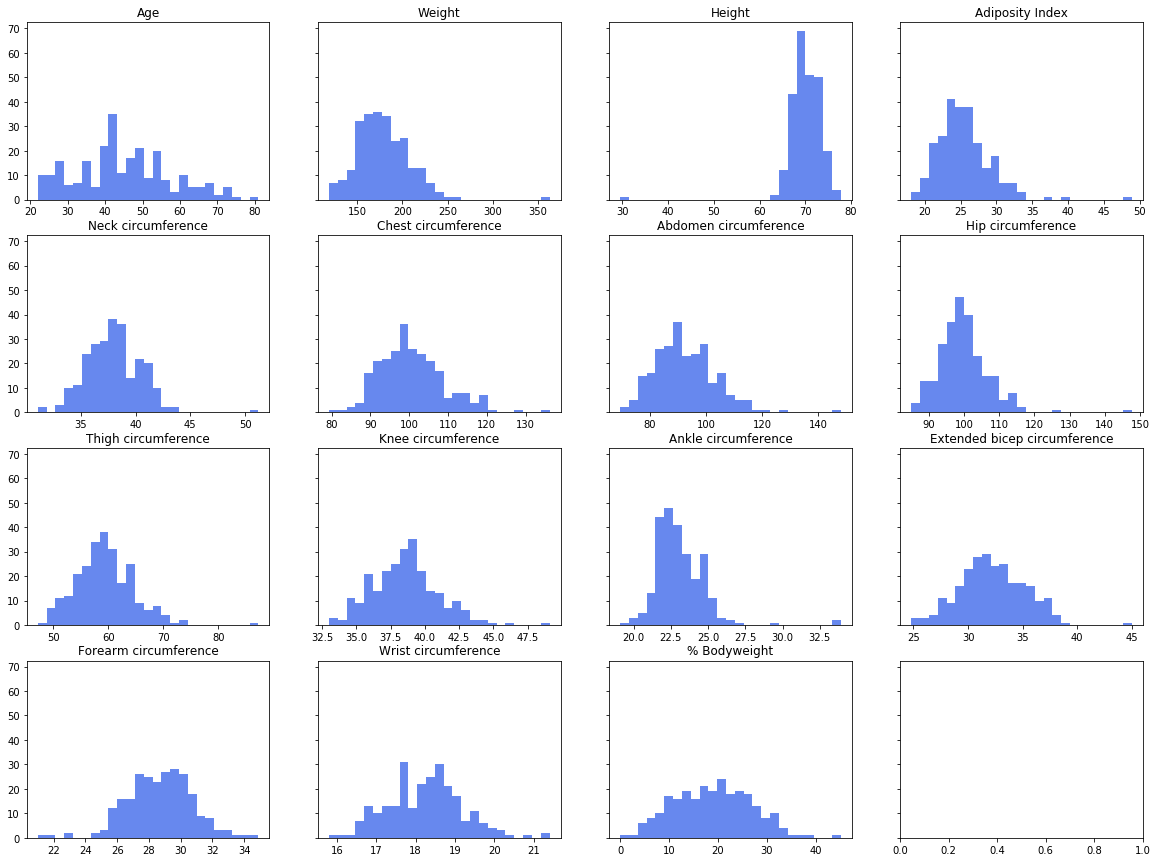

In [143]:
with sns.color_palette('coolwarm'):
    f, ax = plt.subplots(4, 4, figsize=(20,15), sharey=True)
#    for i in range(len(parameter_names)):
    for i in range(4):
        for j in range(4):
            if (i*4+j) < len(parameter_names):
                ax[i,j].hist(data[:,i*4+j], bins=25)
                ax[i,j].set_title(parameter_names[i*4+j])
plt.show()

In [141]:
type(parameter_names)

list

In [142]:
len([1,2])

2